In [7]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt


In [8]:
df=pd.read_csv('Medical_insurance.csv')

In [9]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
df.shape

(2772, 7)

### Handling Null Values


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [12]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

####  we can see that no null value is found in data set 

### Handling duplicates 

In [13]:
df.duplicated().sum()

1435

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.duplicated().sum()

0

In [16]:
df.shape

(1337, 7)

#### EDA


In [17]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [18]:
for i in df:
    print('*************')
    print(i)
    print(df[i].nunique())
    print(df[i].dtypes)

*************
age
47
int64
*************
sex
2
object
*************
bmi
548
float64
*************
children
6
int64
*************
smoker
2
object
*************
region
4
object
*************
charges
1337
float64


In [19]:
obj_cols=df.dtypes[df.dtypes=='object'].index
int_cols=df.dtypes[df.dtypes!='object'].index

In [20]:
print(obj_cols)
print(int_cols)


Index(['sex', 'smoker', 'region'], dtype='object')
Index(['age', 'bmi', 'children', 'charges'], dtype='object')


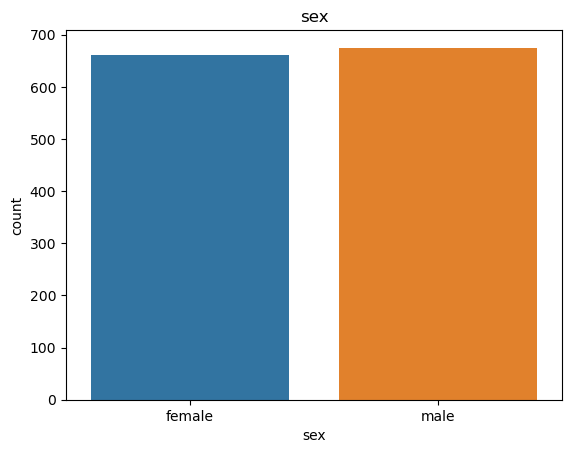

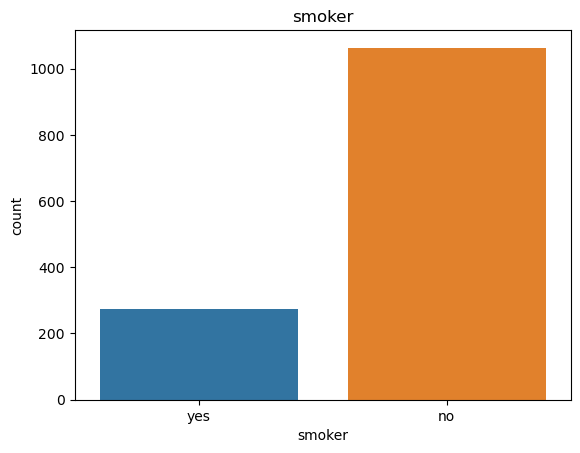

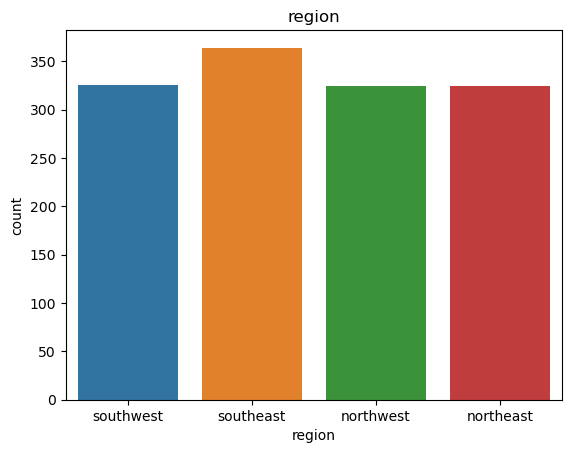

In [21]:
for i in df[obj_cols]:
    sns.countplot(x=df[i])
    plt.title(i)
    plt.show()

##### we can see that males has taken more medical insurance than the females, those who do not smoke has taken insurance than a smoker and southeast customers are taking more insurance compare to the other directions  

#### Handling Outliers

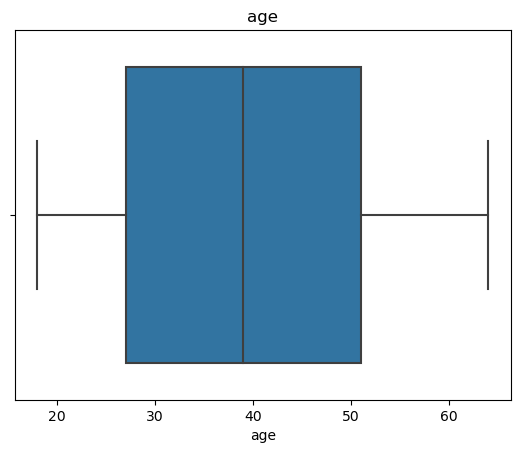

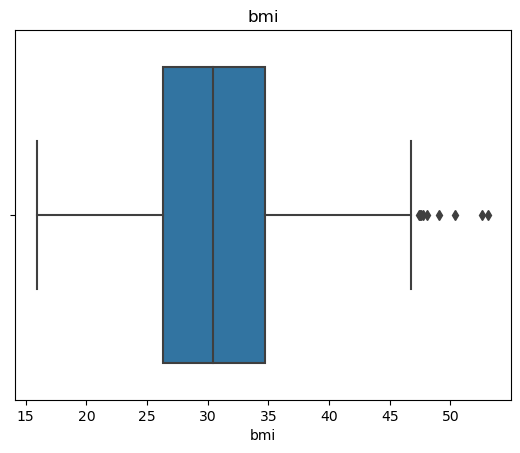

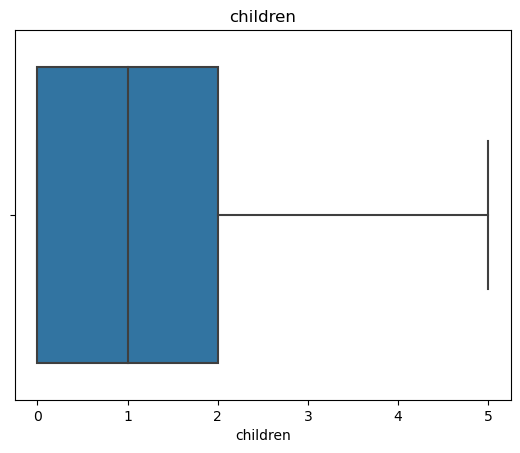

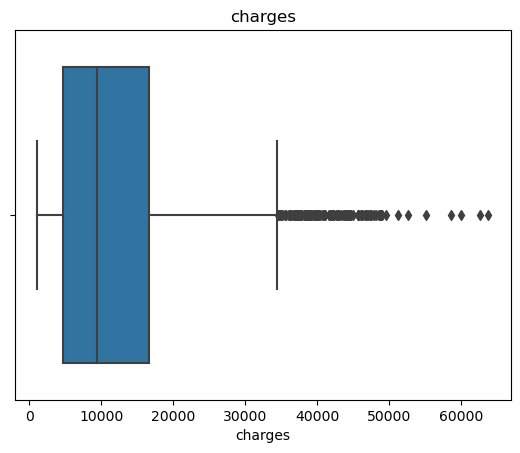

In [22]:
for i in int_cols:
    sns.boxplot(x=df[i])
    plt.title(i)
    plt.show()

In [23]:
df.describe(percentiles=[0.90,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99]).T

,count,mean,std,min,50%,90%,92%,93%,94%,95%,96%,97%,98%,99%,max
age,1337.0,39.222139,14.044333,18.0000,39.0000,59.0000,60.000000,60.00000,61.000000,62.0000,62.000000,63.000000,63.000000,64.000000,64.00000
bmi,1337.0,30.663452,6.100468,15.9600,30.4000,38.6260,39.529600,39.85840,40.358800,41.1080,41.800000,42.455200,43.920800,46.411200,53.13000
children,1337.0,1.095737,1.205571,0.0000,1.0000,3.0000,3.000000,3.00000,3.000000,3.0000,3.000000,4.000000,4.000000,5.000000,5.00000
charges,1337.0,13279.121487,12110.359656,1121.8739,9386.1613,34832.7416,37499.218708,38768.59374,39866.074652,41210.0498,42920.126232,44495.190584,46677.324238,48537.796878,63770.42801


We can see that charges and bmi contains outliers 

### Removing Outliers 

In [24]:
df.loc[df['charges'] > 34832.7416, 'charges'] = 34832.7416

In [25]:
df.loc[df['bmi']>46.411200,'bmi']=46.411200

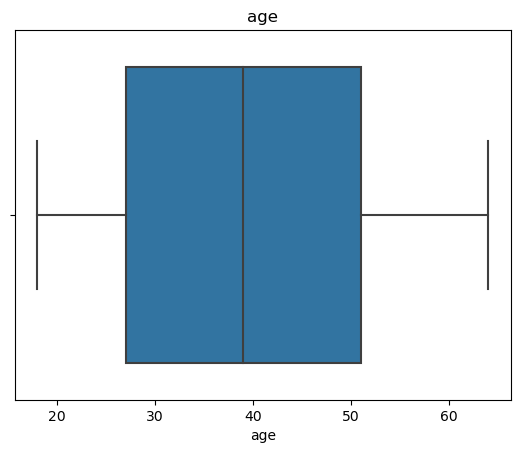

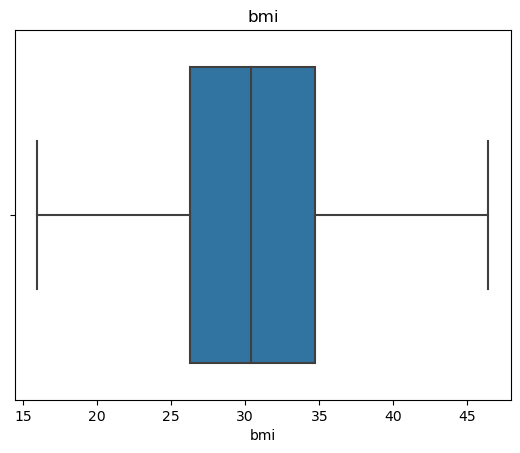

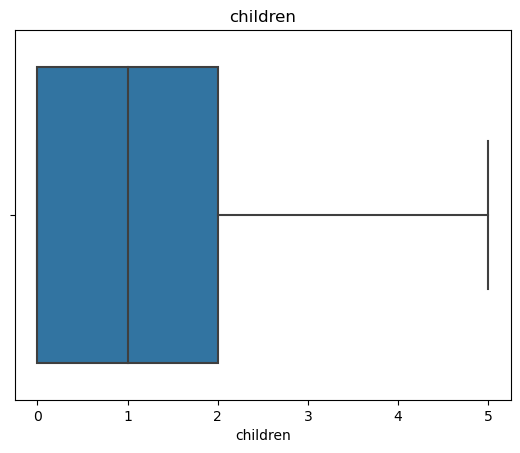

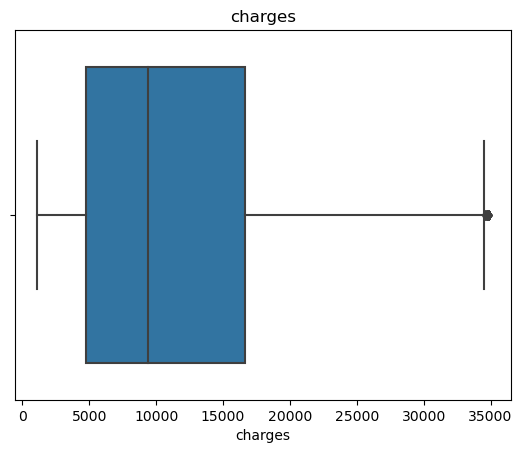

In [26]:
for i in int_cols:
    sns.boxplot(x=df[i])
    plt.title(i)
    plt.show()

In [27]:
corr=df.corr()

<AxesSubplot:>

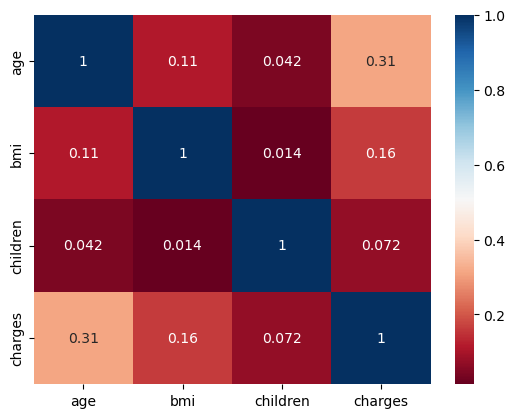

In [28]:
sns.heatmap(corr,annot=True,cmap='RdBu')

<AxesSubplot:>

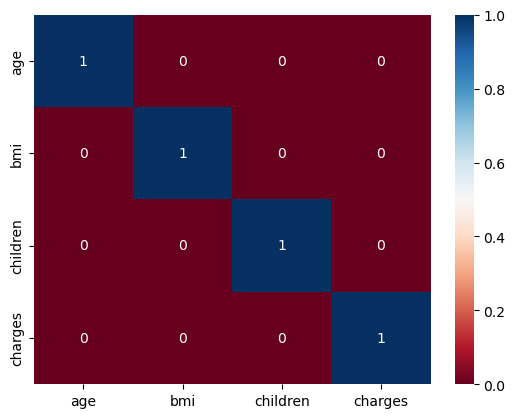

In [29]:
sns.heatmap(abs(corr)>0.7,annot=True,cmap='RdBu')


#### Insight :No Correlated columns found in data set

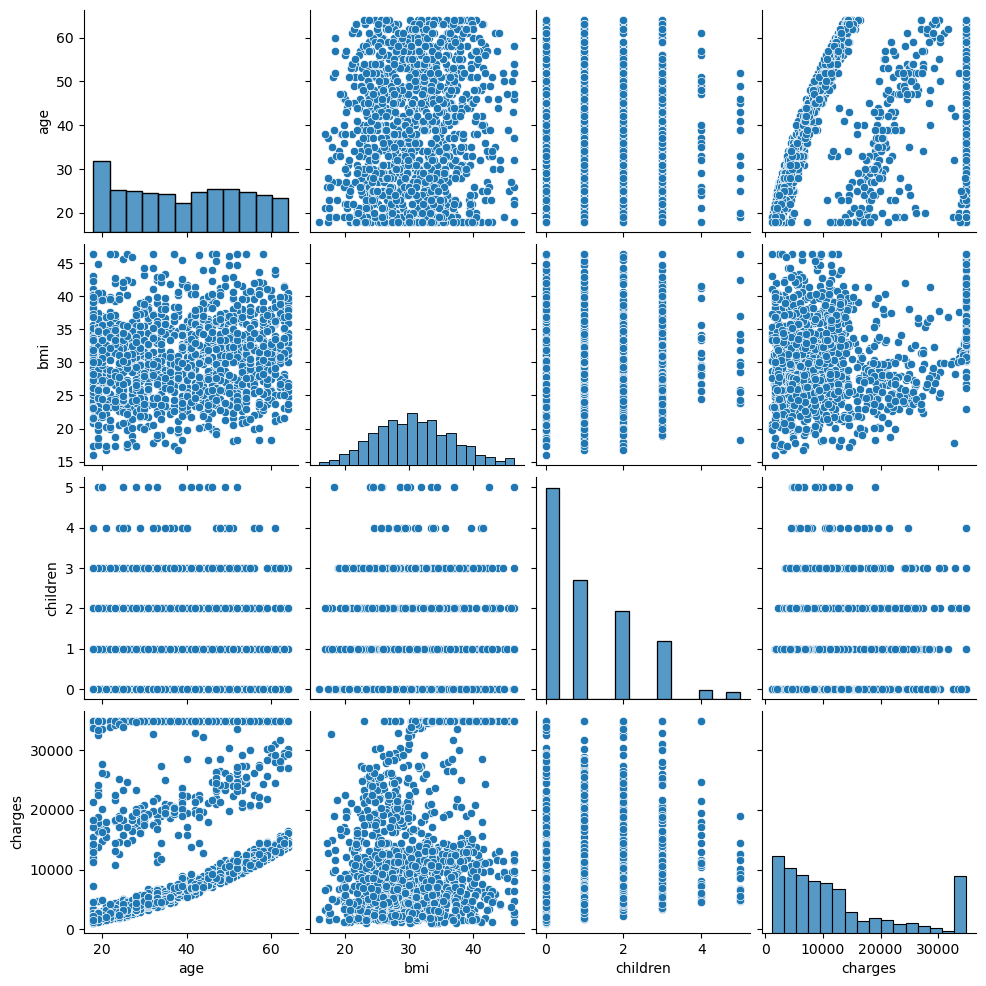

In [30]:
sns.pairplot(df)

#### Insights <br>
1. Age vs. Charges: There is a clear upward trend, indicating that as age increases, the charges also tend to increase. This is likely due to older individuals having higher medical expenses.<br>
2. BMI vs. Charges: There is a slight positive correlation, indicating that higher BMI may be associated with higher charges, but the relationship is not very strong.<br>
3. Children vs. Charges: There does not appear to be a strong relationship between the number of children and charges, as the data points are scattered without a clear pattern.

##### Data encoding

In [31]:
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Displaying the first few rows of the encoded DataFrame
print(df_encoded.head())

   age     bmi  children      charges  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0  16884.92400         0           1                 0   
1   18  33.770         1   1725.55230         1           0                 0   
2   28  33.000         3   4449.46200         1           0                 0   
3   33  22.705         0  21984.47061         1           0                 1   
4   32  28.880         0   3866.85520         1           0                 1   

   region_southeast  region_southwest  
0                 0                 1  
1                 1                 0  
2                 1                 0  
3                 0                 0  
4                 0                 0  


In [32]:
df['sex'].value_counts()

male      675
female    662
Name: sex, dtype: int64

##### Data splitting 

In [33]:
x=df_encoded.drop('charges',axis=1)
y=df_encoded['charges']
print(x.shape)
print(y.shape)


(1337, 8)
(1337,)


#### Splitting Data 

In [34]:
from sklearn.model_selection import  train_test_split

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(935, 8)
(402, 8)
(935,)
(402,)


In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [38]:
def eval_model(ytest,ypred):
    mae = mean_absolute_error(ytest,ypred)
    mse = mean_squared_error(ytest,ypred)
    rmse = np.sqrt(mse)
    r2s = r2_score(ytest,ypred)
    print('MAE',mae)
    print('MSE',mse)
    print('RMSE',rmse)
    print('R2 Score',r2s)
    
def mscore(model):
    print('Train Score',model.score(x_train,y_train))  # Train R2 Score
    print('Test Score',model.score(x_test,y_test))     # Test R2 Score

In [39]:
lr1 = LinearRegression()
lr1.fit(x_train,y_train)  

LinearRegression()

In [40]:
mscore(lr1)

Train Score 0.7358644456748973
Test Score 0.7719063012424741


In [41]:
### WE can see that th model is underfit

In [42]:
ypred_lr1 = lr1.predict(x_test)
eval_model(y_test,ypred_lr1)

MAE 3304.29160241088
MSE 24715475.154649947
RMSE 4971.466097103545
R2 Score 0.7719063012424741


In [43]:
from sklearn.tree import DecisionTreeRegressor

In [44]:
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train, y_train)

DecisionTreeRegressor()

In [45]:
y_pred1 = dt_model.predict(x_test)
eval_model(y_test,y_pred1)

MAE 2845.791376169155
MSE 36884537.488455385
RMSE 6073.264154345288
R2 Score 0.6596006942994346
